## Programming Exercise 5: Regularized Linear Regression and Bias vs. Variance

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from scipy.io import loadmat
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

### Visualizing the dataset

In [11]:
datafile = 'ex5data1.mat'
mat = loadmat(datafile)
#Training set
X, y = mat['X'], mat['y']

#Cross validation set
X_val, y_val = mat['Xval'], mat['yval']

#Test set
X_test, y_test = mat['Xtest'], mat['ytest']

#Insert a column of 1's to all of the X's, as usual
X = np.insert(X,0, 1, axis = 1)
X_val = np.insert(X_val, 0, 1, axis = 1)
X_test = np.insert(X_test, 0, 1, axis = 1)

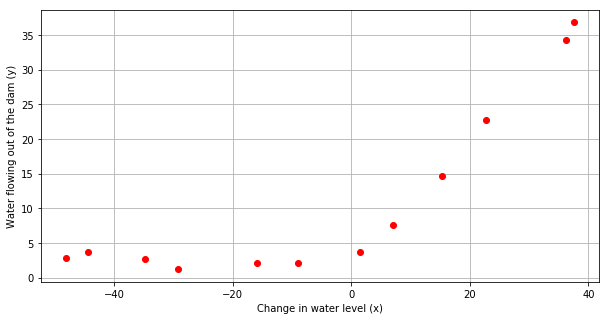

In [12]:
def plotData():
    plt.figure(figsize = (10,5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1],y ,'ro')
    plt.grid(True)
    
plotData()

#### Regularized linear regression cost function

Cost Function: <br>
$$J(\theta) = \frac{1}{2m}\bigg[\sum_{i = 1}^{m}\big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big)^2 + \lambda\sum_{j = i}^{m}\theta_j^2\bigg]$$<br>

Training Error: <br>
$$J(\theta) = \frac{1}{2m}\bigg[\sum_{i = 1}^{m}\big(h_{\theta}\big(x^{(i)}\big) - y^{(i)}\big)^2 \bigg]$$<br>

Cross Validation Error:<br>
$$J_{cv}(\theta) = \frac{1}{2m_{cv}}\bigg[\sum_{i = 1}^{m_{cv}}\big(h_{\theta}\big(x_{cv}^{(i)}\big) - y_{cv}^{(i)}\big)^2 \bigg]$$<br>


Test Error:<br>
$$J_{test}(\theta) = \frac{1}{2m_{test}}\bigg[\sum_{i = 1}^{m_{test}}\big(h_{\theta}\big(x_{test}^{(i)}\big) - y_{test}^{(i)}\big)^2 \bigg]$$<br>






Partial derivatives:<br>
for j = 0 
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0} $$

for j = 1,2,3...m 
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} +\frac{\lambda}{m}\theta_{j}^{2}$$

Vectorized Partial Derivative <br>
for j = 0 
$$\frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m} X^T(h-y)$$
for j = 1,2,3... n
$$\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(h-y) + \frac{\lambda}{m}\theta_{j}^{2}$$


                                

In [13]:
#compute the hypothesis
def h(theta, X): #Linear hypothesis function
    hyp = np.dot(X,theta)
    return(hyp)

# compute the cost function
def computeCost(theta, X, y, regu = 0): 
    m = X.shape[0]
    hyp = h(theta,X).reshape((m,1))
    J = float((1./(2 * m)) * np.dot((hyp - y).T,(hyp - y))) + (float(regu)/(2 * m)) * float(theta[1:].T.dot(theta[1:]))
    
    return J

In [14]:
# Using theta initialized at [1; 1], and lambda = 1, you should expect to 
# see an output of 303.993192
theta = np.array([[1],[1]])
regu = 1
J1 = computeCost(theta, X, y, 1)
print('Initial test:')
print('\ttheta_0 = %.0f\n\ttheta_1 = %.0f'%(theta[0],theta[1]))
print('\tRegularisation parameter = %.1f'%(regu))
print('\tCost Function = %.3f'%(J1))


Initial test:
	theta_0 = 1
	theta_1 = 1
	Regularisation parameter = 1.0
	Cost Function = 303.993


#### Regularized linear regression gradient

In [17]:
def computeGradient(theta, X, y, regu = 0):
    theta = theta.reshape((theta.shape[0],1))
    m = X.shape[0]
    #grad has same shape as Theta (2 x 1)
    hyp = h(theta, X).reshape((m,1))
    #Gradient Cost Function - bias term not reulated
    dJ = (1/m) * X.T.dot(hyp - y) + (regu / m) * np.r_[[[0]],theta[1:].reshape(-1,1)]
    #flatten the grdient (for optimise function)
    dJ = dJ.flatten()
    return(dJ)

theta = np.array([[1.],[1.]])

regu = 1
dJ =  computeGradient(theta, X, y, regu)
J1 = computeCost(theta, X, y, 1)
print('Initial test:')
print('\ttheta_0 = %.0f\n\ttheta_1 = %.0f'%(theta[0],theta[1]))
print('\tRegularisation parameter = %.1f'%(regu))
print('\tdJ_theta_0 = %.2f'%(dJ[0]))
print('\tdJ_theta_1 = %.2f'%(dJ[1]))
print('\tCost Function = %.3f'%(J1))


Initial test:
	theta_0 = 1
	theta_1 = 1
	Regularisation parameter = 1.0
	dJ_theta_0 = -15.30
	dJ_theta_1 = 598.25
	Cost Function = 303.993


#### Fitting linear regression

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


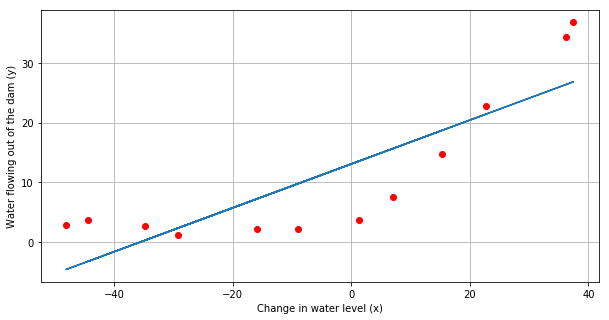

In [22]:
def optimizeTheta(Theta_initial, X, y, regu = 0, print_output = True):
    fit_theta = scipy.optimize.fmin_cg(computeCost, x0 = Theta_initial,\
                                       fprime = computeGradient,\
                                       args = (X, y, regu),\
                                       disp = print_output,\
                                       epsilon = 1.49e-12,\
                                       maxiter = 1000)
    
    fit_theta = fit_theta.reshape((Theta_initial.shape[0],1))
    
    return(fit_theta)

theta = np.array([[1],[1]])
fit_theta = optimizeTheta(theta, X, y, 0)

plotData()
plt.plot(X[:,1], h(fit_theta,X).flatten())

### Learning curves

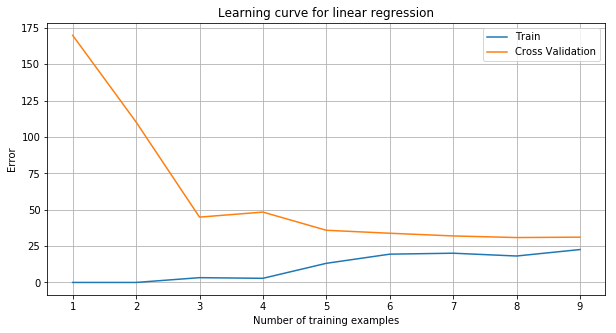

In [23]:
def plotLearningCurve():

    initial_theta = np.array([[1],[1]])
    m, error_train, error_val = [], [], []
    for x in range(1,10,1):
        train_subset = X[:x,:]
        y_subset = y[:x]
        m.append(y_subset.shape[0])
        fit_theta = optimizeTheta(initial_theta, train_subset, y_subset, regu = 0,print_output = False)
        error_train.append(computeCost(fit_theta, train_subset,y_subset, regu = 0))
        error_val.append(computeCost(fit_theta, X_val, y_val,regu = 0))
        
    plt.figure(figsize = (10,5))
    plt.plot(m, error_train, label = 'Train')
    plt.plot(m, error_val, label = 'Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)
    
    
plotLearningCurve()

You can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias  problem in the model – the linear regression model is too simple and is unable to fit our dataset well."


### Polynomial regression

In [25]:
def genPolyFeatures(X, p):

    newX = X.copy()
    for i in range(p):
        dim = i + 2
        newX = np.insert(newX, newX.shape[1],np.power(newX[:,1], dim),axis = 1)
    return newX

def featureNormalize(X):
   
    Xnorm = X.copy()
    stored_feature_means = np.mean(Xnorm,axis = 0) #column-by-column
    Xnorm[:,1:] = Xnorm[:,1:] - stored_feature_means[1:]
    stored_feature_stds = np.std(Xnorm,axis = 0, ddof = 1)
    Xnorm[:,1:] = Xnorm[:,1:] / stored_feature_stds[1:]
    
    return(Xnorm, stored_feature_means, stored_feature_stds)
    

### Learning Polynomial Regression

In [26]:
#Generate an X matrix with terms up through x^8
#(7 additional columns to the X matrix)

global_d = 5
newX = genPolyFeatures(X,global_d)
newX_norm, stored_means, stored_stds = featureNormalize(newX)
#Find fit parameters starting with 1's as the initial guess
theta = np.ones((newX_norm.shape[1],1))
fit_theta = optimizeTheta(theta,newX_norm,y,0.)

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 132
         Function evaluations: 251
         Gradient evaluations: 251


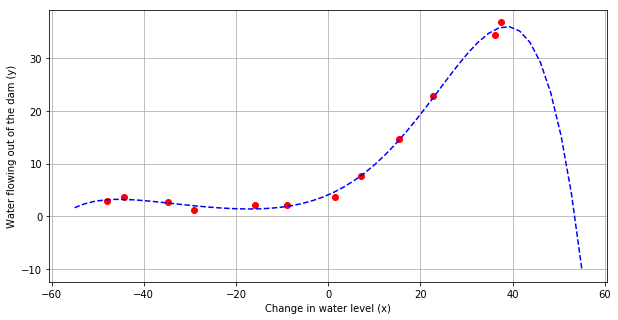

In [27]:
def plotFit(fit_theta, means, stds):

    n_points_to_plot = 50
    x_vals = np.linspace(-55, 55, n_points_to_plot)
    x_mat = np.ones((n_points_to_plot, 1))
    
    x_mat = np.insert(x_mat, x_mat.shape[1], x_vals.T,axis = 1)
    x_mat = genPolyFeatures(x_mat,len(fit_theta) - 2)
    #This is undoing feature normalization
    x_mat[:,1:] = x_mat[:,1:] - means[1:]
    x_mat[:,1:] = x_mat[:,1:] / stds[1:]
    plotData()
    plt.plot(x_vals, h(fit_theta, x_mat),'b--')

plotFit(fit_theta,stored_means,stored_stds)

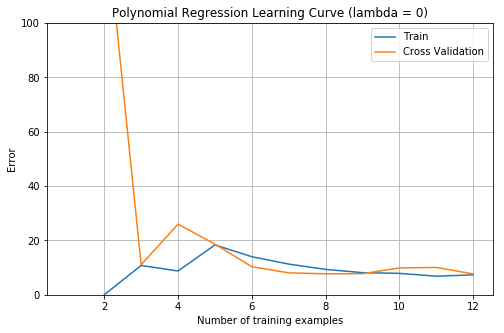

In [28]:
def plotPolyLearningCurve(mylambda = 0):

    initial_theta = np.ones((global_d+2,1))
    m, error_train, error_val = [], [], []
    myXval, dummy1, dummy2 = featureNormalize(genPolyFeatures(X_val,global_d))

    for x in range(1,13,1):
        train_subset = X[:x,:]
        y_subset = y[:x]
        m.append(y_subset.shape[0])
        train_subset = genPolyFeatures(train_subset, global_d)   
        train_subset, dummy1, dummy2 = featureNormalize(train_subset)
        fit_theta = optimizeTheta(initial_theta, train_subset, y_subset,regu = regu, print_output = False)
        error_train.append(computeCost(fit_theta, train_subset, y_subset, regu = regu))
        error_val.append(computeCost(fit_theta, myXval, y_val, regu = regu))
        
    plt.figure(figsize=(8,5))
    plt.plot(m,error_train,label='Train')
    plt.plot(m,error_val,label='Cross Validation')
    plt.legend()
    plt.title('Polynomial Regression Learning Curve (lambda = 0)')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.ylim([0,100])
    plt.grid(True)
    
plotPolyLearningCurve()

#### Optional: Adjusting the regularization parameter

Optimization terminated successfully.
         Current function value: 7.338822
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29


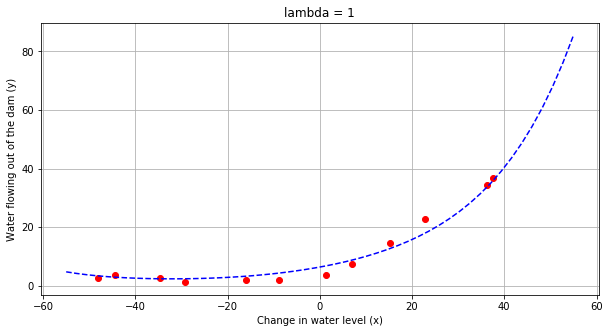

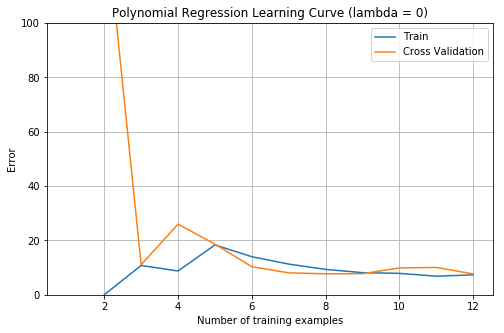

In [29]:
#Try Lambda = 1
regu = 1
theta = np.zeros((newX_norm.shape[1],1))
fit_theta = optimizeTheta(theta, newX_norm, y, 1)
plotFit(fit_theta, stored_means, stored_stds)
plt.title('lambda = %.0f'%(regu))
plotPolyLearningCurve(regu)

Optimization terminated successfully.
         Current function value: 67.547554
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13


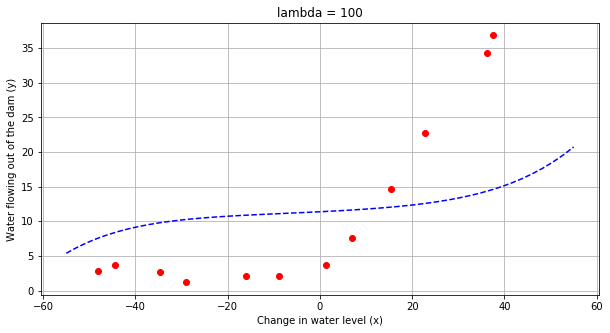

In [31]:
#Try Lambda = 100
#Note after one iteration, the lambda of 100 penalizes the theta params so hard
#that the minimizer loses precision and gives up...
#so the plot below is NOT indicative of a successful fit
regu = 100
theta = np.random.rand(newX_norm.shape[1],1)
fit_theta = optimizeTheta(theta, newX_norm, y, regu)

plotFit(fit_theta, stored_means, stored_stds)
plt.title('lambda = %.0f'%(regu))

### Selecting $\lambda$ using a cross validation set

In [32]:
#lambdas = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
lambdas = np.linspace(0,5,20)
errors_train, errors_val = [], []
for mylambda in lambdas:
    newXtrain = genPolyFeatures(X, global_d)
    newXtrain_norm, dummy1, dummy2 = featureNormalize(newXtrain)
    newXval = genPolyFeatures(X_val, global_d)
    newXval_norm, dummy1, dummy2 = featureNormalize(newXval)
    init_theta = np.ones((newX_norm.shape[1],1))
    fit_theta = optimizeTheta(theta, newXtrain_norm, y, mylambda,False)
    errors_train.append(computeCost(fit_theta, newXtrain_norm, y, regu = mylambda))
    errors_val.append(computeCost(fit_theta, newXval_norm, y_val, regu = mylambda))

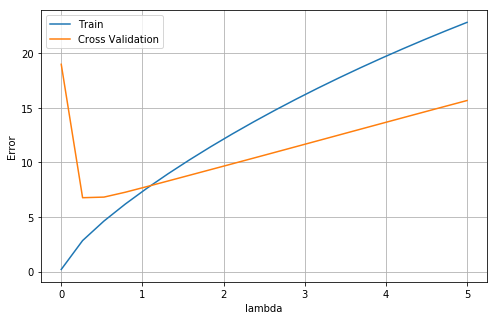

In [33]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, errors_train, label = 'Train')
plt.plot(lambdas, errors_val, label = 'Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)